In [1]:
%%time

!pip install --upgrade pip --quiet
!pip install pandas jupysql duckdb-engine matplotlib --quiet

from pathlib import Path
from urllib.request import urlretrieve

#curr = Path()
#print(curr.as_uri, curr.absolute())
#f = Path("data/penguins.csv")
#print('isFile:',f.is_file(), f.absolute())

if not Path("data/penguins.csv").is_file():
    urlretrieve(
        "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv",
        "penguins.csv",
    )

CPU times: total: 15.6 ms
Wall time: 5.44 s


In [2]:
%load_ext sql
%sql duckdb://


%sql SELECT * FROM 'data/penguins.csv' LIMIT 3

Connecting to 'duckdb://'

Running query in 'duckdb://'

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
Adelie,Torgersen,39.1,18.7,181,3750,MALE
Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
Adelie,Torgersen,40.3,18.0,195,3250,FEMALE


In [3]:
%%sql
SELECT *
FROM 'data/penguins.csv'
WHERE bill_length_mm > 40
LIMIT 3

Running query in 'duckdb://'

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
Adelie,Torgersen,42.0,20.2,190,4250,None
Adelie,Torgersen,41.1,17.6,182,3200,FEMALE


In [4]:
result = %sql SELECT * FROM 'data/penguins.csv'
df = result.DataFrame()
print('head:')
df.head()


Running query in 'duckdb://'

head:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,None
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
QUERY = """
SELECT * FROM 'data/penguins.csv' limit 5
"""

%sql {{QUERY}}

Running query in 'duckdb://'

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
Adelie,Torgersen,39.1,18.7,181,3750,MALE
Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
Adelie,Torgersen,None,None,None,None,None
Adelie,Torgersen,36.7,19.3,193,3450,FEMALE


In [ ]:
%sqlplot boxplot --table 'data/penguins.csv' --column body_mass_g

UsageError: Line magic function `%sqlplot` not found.


In [6]:
%%sql
SELECT island, COUNT(*)
FROM 'data/penguins.csv'
GROUP BY island
ORDER BY COUNT(*) DESC

Running query in 'duckdb://'

island,count_star()
Biscoe,168
Dream,124
Torgersen,52


In [7]:
%%sql --save biscoe --no-execute
SELECT *
FROM 'data/penguins.csv'
WHERE island = 'Biscoe'

Running query in 'duckdb://'

Skipping execution...

<Axes: title={'center': "'body_mass_g' from 'biscoe'"}, ylabel='body_mass_g'>

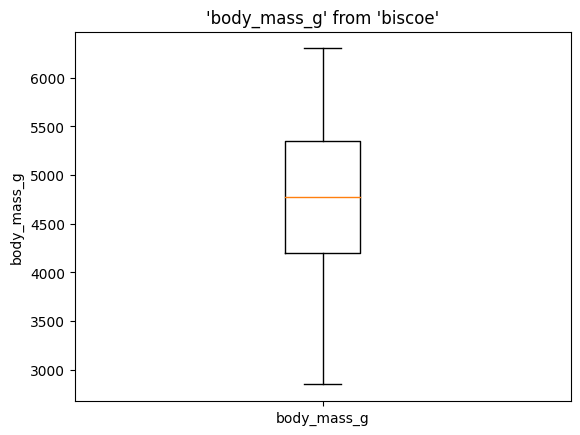

In [ ]:
%sqlplot boxplot --table biscoe --column body_mass_g --with biscoe

<Axes: title={'center': "'body_mass_g' from 'data/penguins.csv'"}, xlabel='body_mass_g', ylabel='Count'>

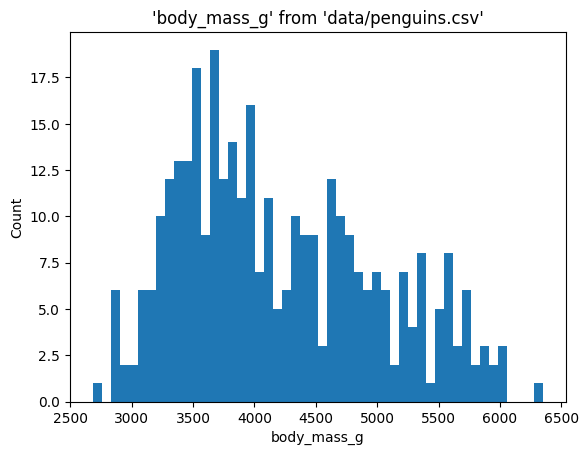

In [ ]:
%sqlplot histogram --table 'data/penguins.csv' --column body_mass_g 

<Axes: title={'center': "'body_mass_g' from 'data/penguins.csv'"}, xlabel='body_mass_g', ylabel='Count'>

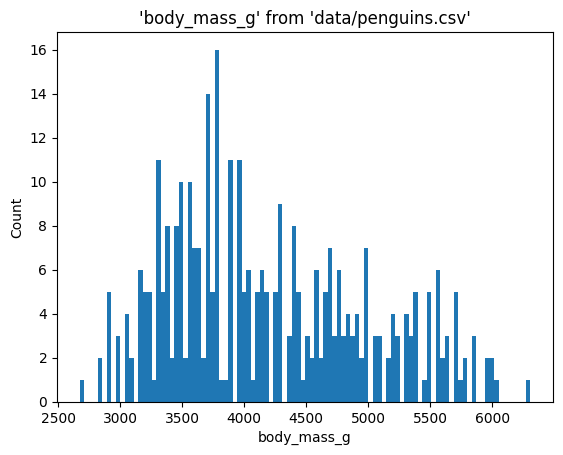

In [ ]:
%sqlplot histogram --table 'data/penguins.csv' --column body_mass_g  --bins 100